In [2]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank.csv


First few rows of the dataset:

Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357


Accuracy Score:
0.8614591009579956


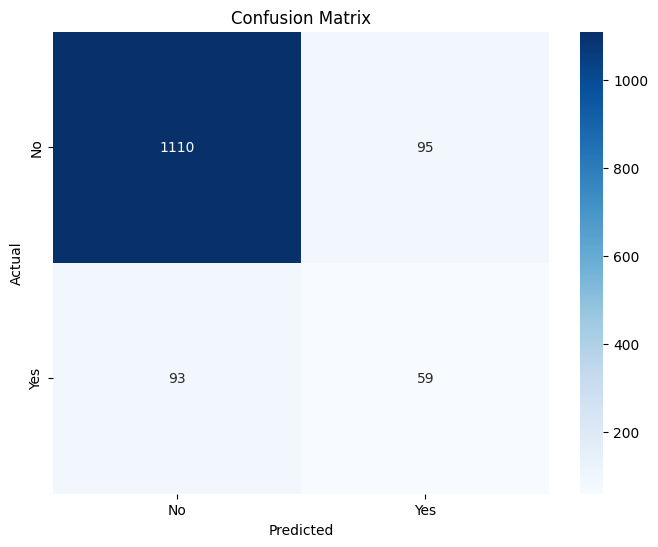

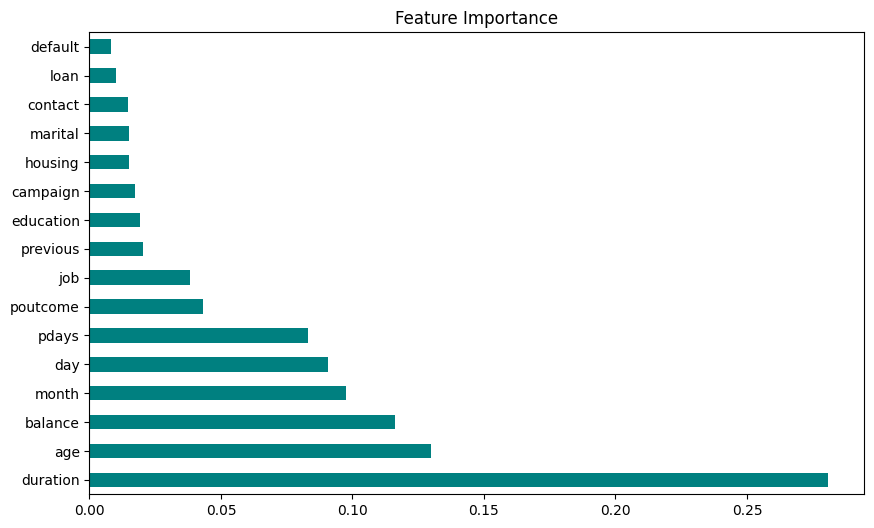

In [3]:
# Install required libraries (if not already installed)
!pip install seaborn matplotlib pandas scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the Bank Marketing dataset
df = pd.read_csv('bank.csv', delimiter=';')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

# Data Cleaning and Preprocessing
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Encode categorical variables using Label Encoding
labelencoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = labelencoder.fit_transform(df[column])

# Feature Selection (X) and Target Variable (y)
X = df.drop(columns='y')  # Features (Demographic and behavioral data)
y = df['y']  # Target (purchase decision)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.show()